In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
credit_data= pd.read_csv('creditcard.csv')

In [55]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [56]:
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [57]:
credit_data.shape

(284807, 31)

In [58]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [59]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [60]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [61]:
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

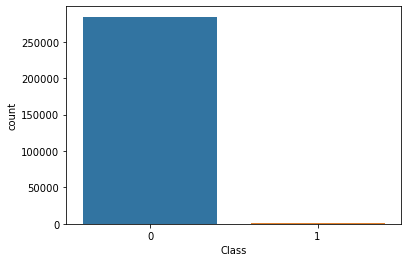

In [62]:
sns.countplot(credit_data['Class'])

# This dataset is highly Unbalanced

# 0 --> Normal Transaction
# 1 --> fraudulent Transaction

In [63]:
# seperating the data for analysis

legit = credit_data[credit_data.Class==0]
fraud = credit_data[credit_data.Class==1]

In [64]:
print(legit.shape,fraud.shape)


(284315, 31) (492, 31)


In [65]:
# statistical measures of our data

legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [66]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [67]:
# compare the values for both transactions

credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# UnderSampling

# Build a sample dataset containing similar distribution of normal and fraudulent transactions

In [68]:
legit_sample = legit.sample(n=492)

In [69]:
legit_sample.shape

(492, 31)

# Concatenating two data frames

In [70]:
new_credit_data = pd.concat([legit_sample,fraud],axis=0)

In [71]:
new_credit_data.shape

(984, 31)

In [72]:
new_credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282951,171269.0,1.417656,-1.052550,-2.197074,0.594578,-0.052011,-0.688052,0.423372,-0.205071,1.151718,...,-0.081229,-0.794475,-0.076320,0.447126,-0.173252,-0.143169,-0.080182,0.037996,334.45,0
99093,66960.0,-4.710489,2.209930,-0.530302,0.596258,0.549449,0.052036,-0.164845,0.258258,2.574300,...,-0.844754,-0.136340,-0.909703,-0.618444,0.557165,-0.108899,2.168344,1.206679,78.63,0
108112,70770.0,-1.322328,-0.081069,1.312412,0.684457,-1.164447,0.634781,0.717325,0.648742,0.279387,...,0.214890,0.204907,0.750001,0.025144,-0.597566,-0.705876,0.029889,0.135588,286.35,0
207126,136530.0,1.985756,-0.083099,-2.499083,0.483282,0.506381,-1.889649,1.093816,-0.647856,0.250972,...,0.325965,0.932921,-0.272072,0.096202,0.755888,0.115710,-0.099496,-0.074358,81.32,0
132902,80166.0,-0.925392,0.724665,1.245048,0.587378,-0.489449,-0.077662,1.710204,-0.239716,-0.726181,...,0.182436,0.555516,-0.028688,0.424951,0.076751,-0.376448,0.078932,0.088914,230.00,0


In [73]:
new_credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [74]:
new_credit_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [75]:
new_credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,90700.721545,0.109363,0.041336,-0.007342,-0.050682,0.116285,0.202120,0.016510,0.095643,0.015653,...,-0.035331,-0.034480,-0.063231,0.005853,-0.011306,0.006138,-0.033716,0.006711,0.013891,79.227053
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [76]:
# Splitting the data

X = new_credit_data.drop(columns=['Class'],axis=1)
y = new_credit_data['Class']

In [77]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
282951,171269.0,1.417656,-1.052550,-2.197074,0.594578,-0.052011,-0.688052,0.423372,-0.205071,1.151718,...,0.443484,-0.081229,-0.794475,-0.076320,0.447126,-0.173252,-0.143169,-0.080182,0.037996,334.45
99093,66960.0,-4.710489,2.209930,-0.530302,0.596258,0.549449,0.052036,-0.164845,0.258258,2.574300,...,0.734483,-0.844754,-0.136340,-0.909703,-0.618444,0.557165,-0.108899,2.168344,1.206679,78.63
108112,70770.0,-1.322328,-0.081069,1.312412,0.684457,-1.164447,0.634781,0.717325,0.648742,0.279387,...,0.275545,0.214890,0.204907,0.750001,0.025144,-0.597566,-0.705876,0.029889,0.135588,286.35
207126,136530.0,1.985756,-0.083099,-2.499083,0.483282,0.506381,-1.889649,1.093816,-0.647856,0.250972,...,-0.200457,0.325965,0.932921,-0.272072,0.096202,0.755888,0.115710,-0.099496,-0.074358,81.32
132902,80166.0,-0.925392,0.724665,1.245048,0.587378,-0.489449,-0.077662,1.710204,-0.239716,-0.726181,...,-0.051283,0.182436,0.555516,-0.028688,0.424951,0.076751,-0.376448,0.078932,0.088914,230.00


In [78]:
X.shape

(984, 30)

In [79]:
y.head()

282951    0
99093     0
108112    0
207126    0
132902    0
Name: Class, dtype: int64

In [80]:
y.shape

(984,)

# Train Test Split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [82]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(787, 30) (787,) (197, 30) (197,)


# Model Training

In [83]:
model = LogisticRegression(max_iter=1000)

In [84]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [85]:
train_predictions = model.predict(X_train)

In [86]:
print("Accuracy on training data: ",accuracy_score(y_train,train_predictions))

Accuracy on training data:  0.9504447268106735


In [87]:
test_predictions = model.predict(X_test)

In [88]:
print("Accuracy on testing data: ",accuracy_score(y_test,test_predictions))

Accuracy on testing data:  0.9441624365482234
